# Ramsey King
# DSC 630 - Predictive Analytics
# September 5, 2021
# Exercise 1.2

In [1]:
import pandas as pd
import numpy as np

blm_data = pd.read_csv('week1blsfile.csv')
blm_data.shape

(2513, 5)

These are the Employment, Hours, and Earnings from the Current Employment Statistics survey (National) as found at:
https://beta.bls.gov/dataViewer/view/timeseries/'Series ID', where 'Series ID' is defined below (beginning with 'CES...')

The following categories were imported into the file:
- CES0500000002 - AVERAGE WEEKLY HOURS OF ALL EMPLOYEES - Total private
- CES2000000010 - WOMEN EMPLOYEES, THOUSANDS - Construction
- CES0000000001 - ALL EMPLOYEES, THOUSANDS - Total nonfarm
- CES3000000010 - WOMEN EMPLOYEES, THOUSANDS - Manufacturing
- CES3232500010 - WOMEN EMPLOYEES, THOUSANDS - Chemicals
- CES4142460010 - WOMEN EMPLOYEES, THOUSANDS - Chemicals
- CES4142470010 - WOMEN EMPLOYEES, THOUSANDS - Petroleum
- CES5000000010 - WOMEN EMPLOYEES, THOUSANDS - Information
- CES9000000010 - WOMEN EMPLOYEES, THOUSANDS - Government
- CEU0000000001 - ALL EMPLOYEES, THOUSANDS - Total nonfarm

For comparison purposes, we will delete all categories not named 'Women Employees, Thousands' from the data set

In [2]:
values_to_keep = ['CES2000000010', 'CES3000000010', 'CES3232500010', 'CES4142460010', 'CES4142470010',
                  'CES5000000010', 'CES9000000010'
                 ]
tester = blm_data['Series ID'].isin(values_to_keep)
blm_data = blm_data[tester]

# Will add a numeric column for months i.e. M01 = 1, M02 = 2, etc.
def month_counter(row, value):
    return value[row]

month_dict = {'M01': 1, 'M02': 2, 'M03': 3, 'M04': 4, 'M05': 5, 'M06': 6, 'M07': 7,
              'M08': 8, 'M09': 9, 'M10':10, 'M11':11, 'M12':12}
blm_data['Month_Num'] = blm_data['Period'].apply(month_counter, args= (month_dict,))

# add a month_year column to the data frame
blm_data['Month_Year'] = blm_data['Month_Num'].astype(str) +'-'+ blm_data['Year'].astype(str)

# convert the newly created month_year column to a datetime column
blm_data['Month_Year'] = pd.to_datetime(blm_data['Month_Year'], format='%m-%Y')

print(blm_data.head())
blm_data.shape

         Series ID  Year Period     Label  Value  Month_Num Month_Year
444  CES2000000010  2000    M01  2000 Jan  844.0          1 2000-01-01
445  CES2000000010  2000    M02  2000 Feb  847.0          2 2000-02-01
446  CES2000000010  2000    M03  2000 Mar  847.0          3 2000-03-01
447  CES2000000010  2000    M04  2000 Apr  848.0          4 2000-04-01
448  CES2000000010  2000    M05  2000 May  849.0          5 2000-05-01


(1810, 7)

Then generate summary statistics for 2 variables, plot some of the features (e.g., histograms, box plots, density plots, etc.) of several variables, and save the data locally as CSV files.

In [3]:
# Summary statistics for the CES2000000010 (Construction) and CES9000000010 (Government) variables
construction = blm_data[blm_data['Series ID'] == 'CES2000000010']
government = blm_data[blm_data['Series ID'] == 'CES9000000010']
print('Construction Statistics: \n', construction.describe(), '\n\n Government Statistics: \n', government.describe())

# Saving the sub dataframes to csv files
construction.to_csv('constuction_data.csv')
government.to_csv('government_data.csv')


Construction Statistics: 
               Year        Value   Month_Num
count   259.000000   259.000000  259.000000
mean   2010.297297   849.459459    6.432432
std       6.245652    83.480173    3.451529
min    2000.000000   707.000000    1.000000
25%    2005.000000   799.000000    3.000000
50%    2010.000000   838.000000    6.000000
75%    2016.000000   928.500000    9.000000
max    2021.000000  1014.000000   12.000000 

 Government Statistics: 
               Year         Value   Month_Num
count   259.000000    259.000000  259.000000
mean   2010.297297  12542.073359    6.432432
std       6.245652    322.503300    3.451529
min    2000.000000  11658.000000    1.000000
25%    2005.000000  12346.000000    3.000000
50%    2010.000000  12516.000000    6.000000
75%    2016.000000  12802.500000    9.000000
max    2021.000000  13191.000000   12.000000


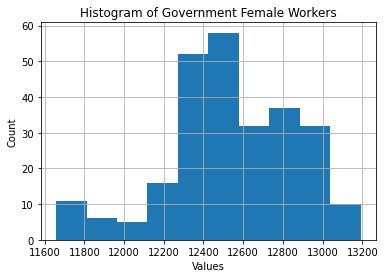

In [4]:
# plot some of the features (e.g., histograms, box plots, density plots, etc.) of several variables
import matplotlib.pyplot as plt
government['Value'].hist()
plt.title("Histogram of Government Female Workers")
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()

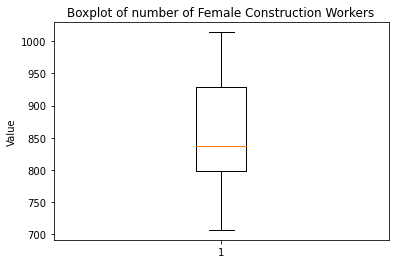

In [5]:
# plot some of the features (e.g., histograms, box plots, density plots, etc.) of several variables
import matplotlib.pyplot as plt

plt.boxplot(construction['Value'])
plt.title("Boxplot of number of Female Construction Workers")
plt.ylabel("Value")
plt.show()

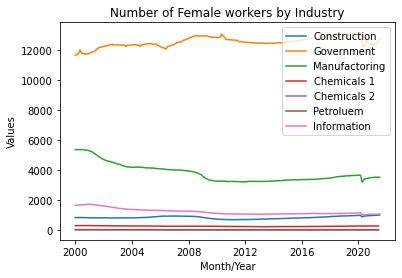

In [6]:
# plot some of the features (e.g., histograms, box plots, density plots, etc.) of several variables
import matplotlib.pyplot as plt

manufactoring = blm_data[blm_data['Series ID'] == 'CES3000000010']
chemicals_1 = blm_data[blm_data['Series ID'] == 'CES3232500010']
chemicals_2 = blm_data[blm_data['Series ID'] == 'CES4142460010']
petroleum = blm_data[blm_data['Series ID'] == 'CES4142470010']
information = blm_data[blm_data['Series ID'] == 'CES5000000010'] 


plt.plot(construction['Month_Year'], construction['Value'], label='Construction')
plt.plot(government['Month_Year'], government['Value'], label='Government')
plt.plot(manufactoring['Month_Year'], manufactoring['Value'], label='Manufactoring')
plt.plot(chemicals_1['Month_Year'], chemicals_1['Value'], label='Chemicals 1')
plt.plot(chemicals_2['Month_Year'], chemicals_2['Value'], label='Chemicals 2')
plt.plot(petroleum['Month_Year'], petroleum['Value'], label='Petroluem')
plt.plot(information['Month_Year'], information['Value'], label='Information')
plt.title("Number of Female workers by Industry")
plt.xlabel("Month/Year")
plt.ylabel("Values")
plt.legend()
plt.show()

Explore Some Bivariate Relations
Use the same dataset within the same website to explore some bivariate relations (e.g. bivariate plot, correlation, table cross table etc.)

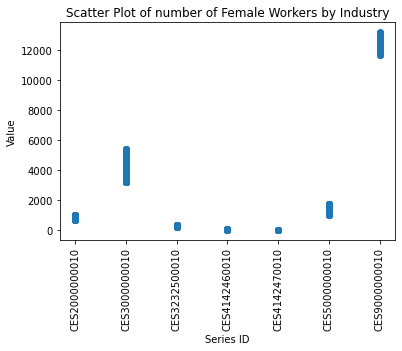

In [7]:
# Bivariate plot
plt.scatter(x=blm_data['Series ID'], y=blm_data['Value'])
plt.title("Scatter Plot of number of Female Workers by Industry")
plt.xlabel("Series ID")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.show()

In [8]:
# Correlation
blm_data.corr(method='pearson')

,Year,Value,Month_Num
Year,1.000000,-0.012419,-0.034230
Value,-0.012419,1.000000,-0.000364
Month_Num,-0.034230,-0.000364,1.000000


In [9]:
# cross tab or pivot table data
pd.pivot_table(blm_data, index='Series ID', values='Value')

,Value
Series ID,
CES2000000010,849.459459
CES3000000010,3805.308880
CES3232500010,271.826357
CES4142460010,38.508915
CES4142470010,32.259302
CES5000000010,1242.239382
CES9000000010,12542.073359


Organize a Data Report
Generate a summary report. Make sure to include: summary for every variable, structure and type of data elements, discuss four results of your data.

In [10]:
# Summary for each variable in the data set
blm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1810 entries, 444 to 2253
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Series ID   1810 non-null   object        
 1   Year        1810 non-null   int64         
 2   Period      1810 non-null   object        
 3   Label       1810 non-null   object        
 4   Value       1810 non-null   float64       
 5   Month_Num   1810 non-null   int64         
 6   Month_Year  1810 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 113.1+ KB


Discuss four results of your data.

1. Government Workers have the highest number of female workers in this dataset than the other segments combined.

In [11]:
combined = [construction['Value'].mean(), manufactoring['Value'].mean(), 
            chemicals_1['Value'].mean(), chemicals_2['Value'].mean(), 
            petroleum['Value'].mean(), information['Value'].mean()
           ]

government['Value'].mean() - sum(combined)

6302.4710634222265

Discuss four results of your data.

2. In the Year 2010, government workers accounted for 70% of the workers in this dataset.

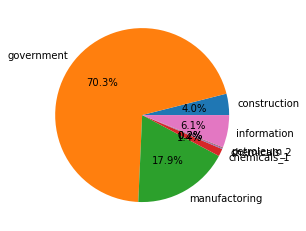

In [12]:
labels = ['construction', 'government', 'manufactoring', 'chemicals_1', 'chemicals_2', 'petroleum', 'information']

construction_2010 = construction[construction['Year'] == 2010]
government_2010 = government[government['Year'] == 2010]
manufactoring_2010 = manufactoring[manufactoring['Year'] == 2010]
chemicals_1_2010 = chemicals_1[chemicals_1['Year'] == 2010]
chemicals_2_2010 = chemicals_2[chemicals_2['Year'] == 2010]
petroleum_2010 = petroleum[petroleum['Year'] == 2010]
information_2010 = information[information['Year'] == 2010]

data = [construction_2010['Value'].mean(), government_2010['Value'].mean(), manufactoring_2010['Value'].mean(), 
        chemicals_1_2010['Value'].mean(), chemicals_2_2010['Value'].mean(), petroleum_2010['Value'].mean(),
        information_2010['Value'].mean()]

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()

Discuss four results of your data.

3. The month and year with the most workers in the government industry for female workers was Februay 2020 with 13191.

In [13]:
government[government.Value == government.Value.max()]

,Series ID,Year,Period,Label,Value,Month_Num,Month_Year
2236,CES9000000010,2020,M02,2020 Feb,13191.0,2,2020-02-01


Discuss four results of your data.

4. The manufactoring female workforce decreased over time from a peak of 5385 in July 2000 to a low of 3210 in April 2020.

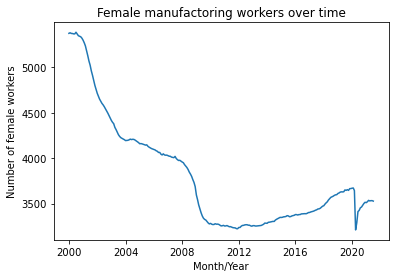

         Series ID  Year Period     Label   Value  Month_Num Month_Year
709  CES3000000010  2000    M07  2000 Jul  5385.0          7 2000-07-01
         Series ID  Year Period     Label   Value  Month_Num Month_Year
946  CES3000000010  2020    M04  2020 Apr  3210.0          4 2020-04-01


In [14]:
plt.plot(manufactoring['Month_Year'], manufactoring['Value'])
plt.xlabel('Month/Year')
plt.ylabel('Number of female workers')
plt.title('Female manufactoring workers over time')
plt.show()
print(manufactoring[manufactoring.Value == manufactoring.Value.max()])
print(manufactoring[manufactoring.Value == manufactoring.Value.min()])